In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (57).jpg
/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (6).jpg
/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (5).jpg
/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (24).jpg
/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (42).jpg
/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (9).jpg
/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (37).jpg
/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (30).jpg
/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (59).jpg
/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (50).jpg
/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (20).jpg
/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (14).jpg
/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (23).jpg
/kaggle/input/f

In [2]:
import os
dircs=os.listdir('/kaggle/input/fishdataset/combine/FishDisease/')

In [3]:
X_directory=[]
y_directory=[]
for directory in dircs:
    image_paths=os.listdir(f'/kaggle/input/fishdataset/combine/FishDisease/{directory}')
    for img_name in image_paths:
        X_directory.append(f'/kaggle/input/fishdataset/combine/FishDisease/{directory}/{img_name}')
        y_directory.append(directory)

In [4]:
df={"fishimages":X_directory,"fishlabels":y_directory}

In [5]:
df = pd.DataFrame(df)
df.style

,fishimages,fishlabels
0,/kaggle/input/fishdataset/combine/FishDisease/white spot/white-spot-166.png,white spot
1,/kaggle/input/fishdataset/combine/FishDisease/white spot/white-spot-246.png,white spot
2,/kaggle/input/fishdataset/combine/FishDisease/white spot/white-spot-263.png,white spot
3,/kaggle/input/fishdataset/combine/FishDisease/white spot/white-spot-264.png,white spot
4,/kaggle/input/fishdataset/combine/FishDisease/white spot/white-spot-92.png,white spot
5,/kaggle/input/fishdataset/combine/FishDisease/white spot/white-spot-123.png,white spot
6,/kaggle/input/fishdataset/combine/FishDisease/white spot/white-spot-93.png,white spot
7,/kaggle/input/fishdataset/combine/FishDisease/white spot/white-spot-29.png,white spot
8,/kaggle/input/fishdataset/combine/FishDisease/white spot/white-spot-223.png,white spot
9,/kaggle/input/fishdataset/combine/FishDisease/white spot/white-spot-45.png,white spot


In [6]:
import pandas as pd
import numpy as np
df=pd.DataFrame(df)

In [7]:
from sklearn.preprocessing import OneHotEncoder
df = df.sample(frac=1).reset_index(drop=True)
onehot=OneHotEncoder()
lab=onehot.fit_transform(df['fishlabels'].values.reshape(-1,1)).toarray()
images=df['fishimages']
print('total labels of images',len(lab))
print('total images',len(images))

total labels of images 1382
total images 1382


In [8]:
import cv2
import matplotlib.pyplot as plt
imgs=[]
for img in images:
    if img.startswith("/kaggle/input/fishdataset/combine/FishDisease/white spot/"):
        other_imag = cv2.imread(img)

        other_frame = cv2.resize(other_imag,(224,224))
        kernel = np.array([[0, -1, 0],
               [-1, 5,-1],
               [0, -1, 0]])
        image_sharp = cv2.filter2D(src=other_frame, ddepth=-1, kernel=kernel)
        hsv = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2HSV)

        # define range of white color in HSV
        # change it according to your need !
        lower_white = np.array([0,0,168], dtype=np.uint8)
        upper_white = np.array([172,111,255],dtype=np.uint8)

        # Threshold the HSV image to get only white colors
        mask = cv2.inRange(hsv, lower_white, upper_white)
        # Bitwise-AND mask and original image
        res = cv2.bitwise_and(image_sharp,image_sharp, mask= mask)
        imgs.append(res)
         
    elif img.startswith("/kaggle/input/fishdataset/combine/FishDisease/red spot/"):
        imag = cv2.imread(img)

        frame = cv2.resize(imag,(224,224)) 

        kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
        image_sharp = cv2.filter2D(src=frame, ddepth=-1, kernel=kernel)
        hsv = cv2.cvtColor(image_sharp,cv2.COLOR_BGR2HSV)

        lower_red = np.array([0,50,50])
        upper_red = np.array([10,255,255])


        #upper red
        lower_red2 = np.array([170,50,50])
        upper_red2 = np.array([180,255,255])

        mask = cv2.inRange(hsv, lower_red, upper_red)
        res = cv2.bitwise_and(image_sharp,image_sharp, mask= mask)


        mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
        res2 = cv2.bitwise_and(image_sharp,image_sharp, mask= mask2)

        red=res+res2
        imgs.append(red)
    elif img.startswith("/kaggle/input/fishdataset/combine/FishDisease/black spot/"):
        other_imag = cv2.imread(img)

        other_frame = cv2.resize(other_imag,(224,224))
        kernel = np.array([[0, -1, 0],
               [-1, 5,-1],
               [0, -1, 0]])
        image_sharp = cv2.filter2D(src=other_frame, ddepth=-1, kernel=kernel)
        imagehsv = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2HSV)


        lower_black = np.array([0,0,0])
        upper_black = np.array([179,255,127])

        imagemask = cv2.inRange(imagehsv, lower_black, upper_black)
        result = cv2.bitwise_not(image_sharp,image_sharp, mask=imagemask)

        imgs.append(result)
    elif img.startswith("/kaggle/input/fishdataset/combine/FishDisease/fresh fish/"):
        other_imag = cv2.imread(img)

        other_frame = cv2.resize(other_imag,(224,224))
        kernel = np.array([[0, -1, 0],
               [-1, 5,-1],
               [0, -1, 0]])
        image_sharp = cv2.filter2D(src=other_frame, ddepth=-1, kernel=kernel)

        imgs.append(image_sharp)

In [9]:
X_preprocess=np.array(imgs)
y_preprocess=np.array(lab)

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mimg
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,7)
from PIL import Image
from scipy import misc

import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# DEEP LEARNING IMPORTS
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Activation, Dropout, Flatten, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [11]:

train_x, test_x, train_y, test_y = train_test_split(X_preprocess, y_preprocess, random_state = 42,
                                                   test_size=0.20)

In [12]:
X_train_norm=train_x/255.0
X_test_norm=test_x/255.0

In [13]:
y_single_dim=np.argmax(train_y,axis=1)

In [14]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
 rotation_range=30,
 featurewise_center=True,   
 zoom_range=0.2,
 horizontal_flip=True,
 vertical_flip=True,
#  validation_split = 0.2,
 fill_mode="nearest")

In [15]:
test_datagen=ImageDataGenerator()

In [16]:
train_generator=train_datagen.flow(X_train_norm, train_y,batch_size=20)

In [17]:
validation_generator=test_datagen.flow(X_test_norm, test_y,batch_size=20)

In [18]:
import keras_tuner as kt

In [19]:
# # import tensorflow
# # import keras
# # def build_model(hp):
    
# #         model = keras.Sequential()
# #         model.add(tensorflow.keras.layers.Flatten(input_shape=(224,224,3)))
# #         model.add(tensorflow.keras.layers.Dense(units=hp.Int('units', min_value=128, max_value=, step=128), activation='relu'))
        
# #         model.add(tensorflow.keras.layers.Dense(4, activation='softmax'))
# #         model.compile(optimizer=tensorflow.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-3, 1e-4])),
# #             loss = 'categorical_crossentropy', metrics = ['accuracy'])
# #         return model

# from kerastuner import HyperModel
# import tensorflow as tf

# class ANNHyperModel(HyperModel):
    
#     def build(self, hp):
#         model = tf.keras.Sequential()
#         model.add(tf.keras.layers.Flatten(input_shape=(224,224,3)))
#         # Tune the number of units in the first Dense layer
#         # Choose an optimal value between 32-512
#         hp_units1 = hp.Int('units1', min_value=32, max_value=512, step=32)
#         hp_units2 = hp.Int('units2', min_value=32, max_value=512, step=32)
#         hp_units3 = hp.Int('units3', min_value=32, max_value=512, step=32)
        
#         model.add(Dense(units=hp_units1, activation='relu'))
#         model.add(tf.keras.layers.Dense(units=hp_units2, activation='relu'))
#         model.add(tf.keras.layers.Dense(units=hp_units3, activation='relu'))
#         model.add(Dense(4, kernel_initializer='normal', activation='softmax'))

#         # Tune the learning rate for the optimizer
#         # Choose an optimal value from 0.01, 0.001, or 0.0001
# #         hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4])

#         model.compile(
#           optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
#           loss='categorical_crossentropy',
#           metrics=['accuracy']
#         )

#         return model

# hypermodel = ANNHyperModel()

# tuner = kt.Hyperband(
#     hypermodel,
#     objective='val_accuracy',
#     max_epochs=10,
#     factor=3,
#     directory='keras_tuner_dir',
#     project_name='keras_tuner_demo2'
# )
# from kerastuner import RandomSearch
# from tensorflow.keras.callbacks import EarlyStopping
# #creating randomsearch object
# # tuner = RandomSearch(build_model,
# #                     objective='val_accuracy',
# #                     max_trials = 5)
# # search best parameter
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

# tuner.search(train_generator,validation_data=test_generator,callbacks=[es])


In [20]:
(train_generator.n)//20

55

best dense layer
units1: 320
units2: 448
units3: 160
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.8050541281700134

In [75]:
import numpy as np
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization   
from keras.callbacks import EarlyStopping
from keras import regularizers
model=Sequential()
# model.add(Conv2D(16,3,3, padding='same',input_shape=(224,224,3), activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
# model.add(MaxPooling2D(pool_size=(2,2),strides=1, padding='valid'))


model.add(Conv2D(112,5,5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=1, padding='valid'))



model.add(Conv2D(256,5,5, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2,2),strides=1, padding='valid'))


model.add(Flatten())


model.add(Dense(320, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
# model.add(Dense(160, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))


model.add(Dense(4, activation='softmax'))

opt = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

history = model.fit_generator(train_generator,
                    validation_data=validation_generator,
                   
                    steps_per_epoch = (train_generator.n)// 20,
                    validation_steps = (validation_generator.n)// 20,
                    epochs = 30,
                    callbacks=[es],          
                    workers=-1)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30
55/55 [==============================] - 12s 211ms/step - loss: 0.8748 - accuracy: 0.6286 - val_loss: 0.7019 - val_accuracy: 0.7385
Epoch 2/30
55/55 [==============================] - 11s 199ms/step - loss: 0.5100 - accuracy: 0.8267 - val_loss: 0.4916 - val_accuracy: 0.8269
Epoch 3/30
55/55 [==============================] - 11s 197ms/step - loss: 0.3758 - accuracy: 0.8912 - val_loss: 0.4047 - val_accuracy: 0.8654
Epoch 4/30
55/55 [==============================] - 11s 205ms/step - loss: 0.2974 - accuracy: 0.9152 - val_loss: 0.4540 - val_accuracy: 0.8692
Epoch 5/30
55/55 [==============================] - 11s 199ms/step - loss: 0.2590 - accuracy: 0.9355 - val_loss: 0.3436 - val_accuracy: 0.8962
Epoch 6/30
55/55 [==============================] - 11s 198ms/step - loss: 0.2932 - accuracy: 0.9189 - val_loss: 0.3627 - val_accuracy: 0.9115
Epoch 7/30
55/55 [==============================] - 11s 209ms/step - loss: 0.2039 - accuracy: 0.9521 - val_loss: 0.2282 - val_accuracy: 0.9577

In [76]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, None, None, 112)   8512      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, None, None, 112)   0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, None, None, 256)   717056    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, None, None, 256)   0         
_________________________________________________________________
flatten_6 (Flatten)          (None, None)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 320)               5243200   
_________________________________________________________________
dense_18 (Dense)             (None, 4)                

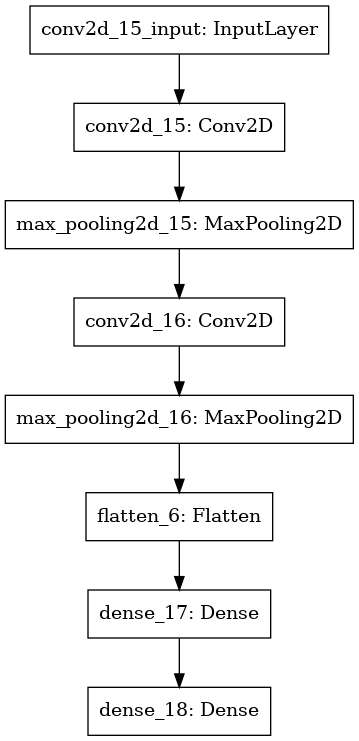

In [77]:
from keras.utils.vis_utils import plot_model
import tensorflow as tf
tf.keras.utils.plot_model(
model, to_file='model.png', show_shapes=False, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [78]:

scores = model.evaluate(validation_generator, verbose = 10 )
print ( scores )

[0.21356943249702454, 0.9530686140060425]


Confusion Matrix
[[60  5  0  0]
 [ 1 79  0  3]
 [ 0  0 53  3]
 [ 0  0  1 72]]
['White Spot', 'Fresh Fish', 'Black Spot', 'Red Spot']


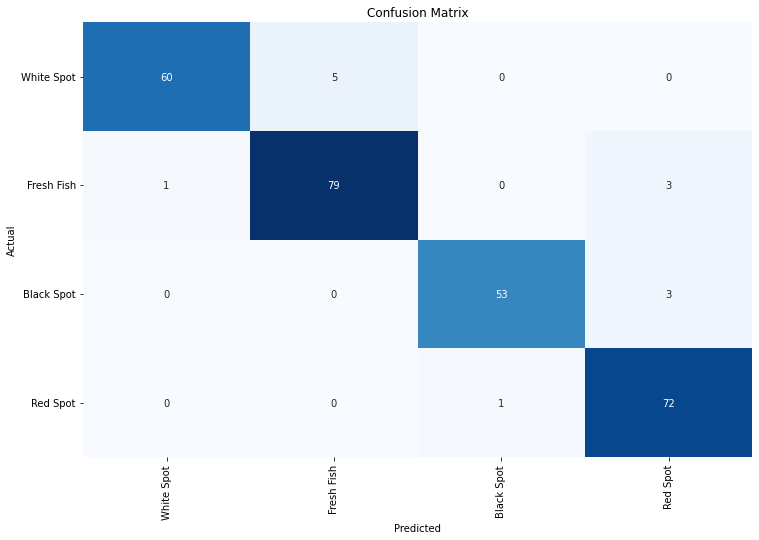

In [79]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
import seaborn as sns
y_test_arg=np.argmax(test_y,axis=1)
Y_pred = np.argmax(model.predict(X_test_norm),axis=1)
print('Confusion Matrix')
cm=confusion_matrix(y_test_arg, Y_pred)
print(cm)
class_name={0:"White Spot",1:"Fresh Fish",2:"Black Spot",3:"Red Spot"}
classes=list(class_name.values())
print(classes)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
plt.xticks(np.arange(4)+.5,classes, rotation=90)
plt.yticks(np.arange(4)+.5, classes, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [80]:
print('classification report')
print(classification_report(y_test_arg,Y_pred,target_names=classes, digits= 4))

classification report
              precision    recall  f1-score   support

  White Spot     0.9836    0.9231    0.9524        65
  Fresh Fish     0.9405    0.9518    0.9461        83
  Black Spot     0.9815    0.9464    0.9636        56
    Red Spot     0.9231    0.9863    0.9536        73

    accuracy                         0.9531       277
   macro avg     0.9572    0.9519    0.9539       277
weighted avg     0.9543    0.9531    0.9531       277



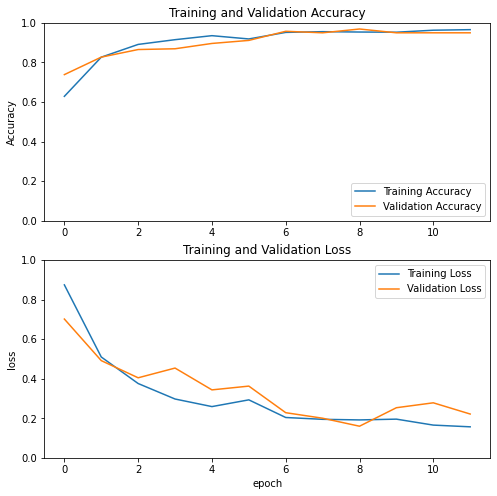

In [81]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0,1.0])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [65]:
model.save('augmentation.h5')

In [29]:
# Y_pred = model.predict(X_test_norm)
# y_pred = np.argmax(Y_pred, axis=1)

In [30]:
# from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# import numpy as np
# import seaborn as sns
# y_test_arg=np.argmax(y_test,axis=1)
# Y_pred = np.argmax(model.predict(X_test_scaled),axis=1)
# print('Confusion Matrix')
# cm=confusion_matrix(y_test_arg, Y_pred)
# print(cm)
# class_name={0:"Black Spot",1:"Fresh Fish",2:"Red Spot",3:"White Spot"}
# classes=list(class_name.values())
# print(classes)
# plt.figure(figsize=(12, 8))
# sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
# plt.xticks(np.arange(4)+.5,classes, rotation=90)
# plt.yticks(np.arange(4)+.5, classes, rotation=0)
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.show()


In [31]:
# print('classification report')
# print(classification_report(y_test_arg,Y_pred,target_names=classes, digits= 4))

In [32]:
# print(history.history.keys())
# # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()
# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

In [33]:
def img_for_pred(img_path):
 
    if img_path.startswith("/kaggle/input/fishdataset/combine/Prediction/red spot/"):
            img = cv2.imread(img_path)
            frame = cv2.resize(img,(224,224)) 

            
            kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
            image_sharp = cv2.filter2D(src=frame, ddepth=-1, kernel=kernel)
            hsv = cv2.cvtColor(image_sharp,cv2.COLOR_BGR2HSV)
        
           

            lower_red = np.array([0,50,50])
            upper_red = np.array([10,255,255])


            #upper red
            lower_red2 = np.array([170,50,50])
            upper_red2 = np.array([180,255,255])

            mask = cv2.inRange(hsv, lower_red, upper_red)
            res = cv2.bitwise_and(image_sharp,image_sharp, mask= mask)


            mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
            res2 = cv2.bitwise_and(image_sharp,image_sharp, mask= mask2)

            img3 = res+res2
            
            
            return img3
    
    elif img_path.startswith("/kaggle/input/fishdataset/combine/Prediction/fresh fish/"):
            img = cv2.imread(img_path)
            frame = cv2.resize(img,(224,224)) 

            
            kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
            image_sharp = cv2.filter2D(src=frame, ddepth=-1, kernel=kernel)
            
            return image_sharp

In [34]:
r=img_for_pred("/kaggle/input/fishdataset/combine/Prediction/red spot/EUS  (12).jpg")
r1=img_for_pred("/kaggle/input/fishdataset/combine/Prediction/red spot/EUS  (13).jpg")
r2=img_for_pred("/kaggle/input/fishdataset/combine/Prediction/red spot/EUS  (1).jpg")

In [35]:
original_red=cv2.imread("/kaggle/input/fishdataset/combine/Prediction/red spot/EUS  (12).jpg")
original1_red=cv2.imread("/kaggle/input/fishdataset/combine/Prediction/red spot/EUS  (13).jpg")
original2_red=cv2.imread("/kaggle/input/fishdataset/combine/Prediction/red spot/EUS  (1).jpg")

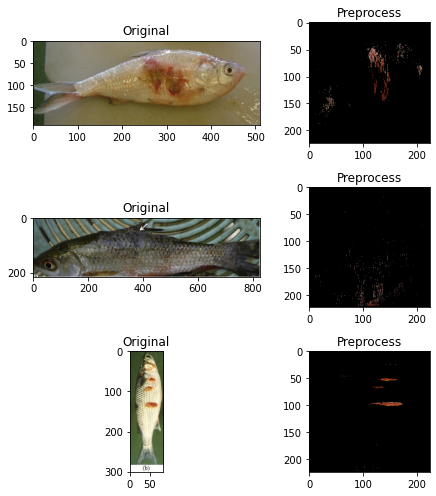

In [36]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(331)
plt.imshow(cv2.cvtColor(original_red, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(332)
plt.imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))
plt.title("Preprocess")
plt.subplot(334)
plt.tight_layout()
plt.imshow(cv2.cvtColor(original1_red, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(335)
plt.imshow(cv2.cvtColor(r1, cv2.COLOR_BGR2RGB))
plt.title("Preprocess")
plt.subplot(337)
plt.tight_layout()
plt.imshow(cv2.cvtColor(original2_red, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(338)
plt.imshow(cv2.cvtColor(r2, cv2.COLOR_BGR2RGB))
plt.title("Preprocess")
plt.tight_layout()


In [37]:
p=model.predict(r[np.newaxis, ...])
labels ={0:"White Spot",1:"Fresh Fish",2:"Black Spot",3:"Red Spot"}
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:", predicted_class, "\n\n")

Classified: Red Spot 




In [38]:
p=model.predict(r1[np.newaxis, ...])
labels ={0:"White Spot",1:"Fresh Fish",2:"Black Spot",3:"Red Spot"}
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:", predicted_class, "\n\n")

Classified: Red Spot 




In [39]:
p=model.predict(r2[np.newaxis, ...])
labels ={0:"White Spot",1:"Fresh Fish",2:"Black Spot",3:"Red Spot"}
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:", predicted_class, "\n\n")

Classified: Black Spot 




In [40]:
fresh=img_for_pred("/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (1).jpg")
fresh1=img_for_pred("/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (12).jpg")

In [41]:
original=cv2.imread("/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (1).jpg")
original1=cv2.imread("/kaggle/input/fishdataset/combine/Prediction/fresh fish/local fish (12).jpg")

Text(0.5, 1.0, 'Preprocess')

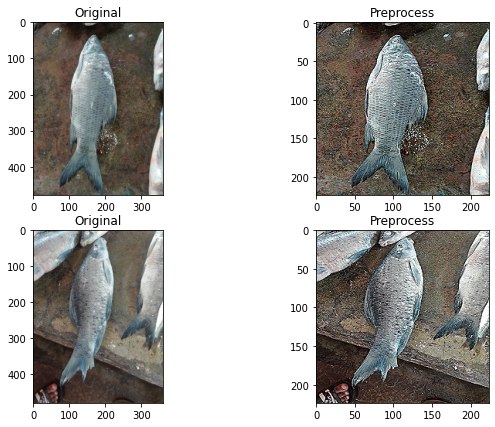

In [42]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(221)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(222)
plt.imshow(cv2.cvtColor(fresh, cv2.COLOR_BGR2RGB))
plt.title("Preprocess")
plt.subplot(223)
plt.imshow(cv2.cvtColor(original1, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(224)
plt.imshow(cv2.cvtColor(fresh1, cv2.COLOR_BGR2RGB))
plt.title("Preprocess")

In [43]:
p=model.predict(fresh[np.newaxis, ...])
labels ={0:"White Spot",1:"Fresh Fish",2:"Black Spot",3:"Red Spot"}
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:", predicted_class, "\n\n")

Classified: Fresh Fish 




In [44]:
p=model.predict(fresh1[np.newaxis, ...])
labels ={0:"White Spot",1:"Fresh Fish",2:"Black Spot",3:"Red Spot"}
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:", predicted_class, "\n\n")

Classified: Fresh Fish 


